Variablididad dentro de cada tópico de DMOZ respecto a valores de P@10 - GR y JS

Para cada combiación Co1 - Co7 y por cada tópico (25) se promedian los valores de las 5 corridas de la *última generación* etrenada

In [84]:
# COMBINATION
comb = 'Co3'


In [85]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.markers as plt_marker

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)

topic_renaming = []   # for plots the topic names are t1, t2...t25
for i in range(1,26):
    topic_renaming.append('$t'+str(i)+ '$')



# folder path


dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/dmoz_topic_variability/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()


for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in sorted(files):
        if "_precision_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
            
            # display DataFrame                                                    
            df_metric = df_metric.iloc[-100:]
            print(df_metric)                                  

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)   
            print(df_ave_data[t])  

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']
         0    1         2    3    4
14900  1.0  1.0  0.900000  1.0  0.9
14901  1.0  1.0  1.000000  1.0  1.0
14902  1.0  1.0  1.000000  1.0  1.0
14903  0.8  1.0  1.000000  1.0  0.9
14904  1.0  0.9  0.800000  1.0  1.0
...    ...  ...       ...  ...  ...
14995  1.0  1.0  1.000000  0.8  1.0
14996  1.0  0.8  1.000000  0.8  1.0
14997  1.0  0.8  1.000000  0.9  1.0
14998  1.0  0.9  1.000000  0.9  1.0
14999  1.0  0.9  0.777778  0.9  1.0

[100 rows x 5 columns]
0    0.950000
1    0.945000
2    0.964528
3    0.965000
4    0.962000
Name: 1, dtype: float64
         0    1    2    3    4
14900  1.0  1.0  1.0  1.0  1.0
14901  0.8  0.8  0.7  1.0  1.0
14902  1.0  0.9  1.0  0.9  1.0
14903  0.9  0.8  1.0  1.0  1.0
14904  1.0  1.0  1.0  1.0  1.0
...    ...  ...  ...  ...  ...
14995  1.0  0.8  0.8  0.9  1.0
14996  0.9  0.9  1.0  1.0  0.9
1

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.950000,0.921,0.960,0.795,0.945,0.877,0.725000,0.953,0.867167,0.853,...,0.768000,0.908,0.950,0.773,0.966,0.620167,0.818,0.687,0.960000,0.806
1,0.945000,0.886,0.893,0.911,0.986,0.949,0.789000,0.831,0.890000,0.856,...,0.770000,0.960,0.940,0.909,0.937,0.559286,0.731,0.840,0.866000,0.879
2,0.964528,0.941,0.957,0.824,0.993,0.939,0.603500,0.863,0.966000,0.904,...,0.844000,0.942,0.961,0.916,0.945,0.470583,0.810,0.785,0.857000,0.844
3,0.965000,0.961,0.921,0.839,0.978,0.871,0.703619,0.957,0.921000,0.843,...,0.535000,0.929,0.950,0.795,0.927,0.680000,0.889,0.828,0.956000,0.667
4,0.962000,0.931,0.918,0.879,0.994,0.868,0.733603,0.899,0.952000,0.879,...,0.729056,0.916,0.968,0.874,0.902,0.779000,0.714,0.862,0.933587,0.750


In [86]:
stats = df_ave_data.agg(['mean', 'count', 'std', 'max', 'min'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.957306,0.928000,0.929800,0.84960,0.979200,0.900800,0.710944,0.900600,0.919233,0.867000,...,0.729211,0.931000,0.953800,0.853400,0.935400,0.621807,0.792400,0.80040,0.914517,0.789200
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000
std,0.009195,0.027749,0.028385,0.04578,0.020167,0.039727,0.067826,0.055198,0.041320,0.024525,...,0.116257,0.020736,0.010872,0.065782,0.023544,0.117128,0.071087,0.06932,0.049536,0.083395
max,0.965000,0.961000,0.960000,0.91100,0.994000,0.949000,0.789000,0.957000,0.966000,0.904000,...,0.844000,0.960000,0.968000,0.916000,0.966000,0.779000,0.889000,0.86200,0.960000,0.879000
min,0.945000,0.886000,0.893000,0.79500,0.945000,0.868000,0.603500,0.831000,0.867167,0.843000,...,0.535000,0.908000,0.940000,0.773000,0.902000,0.470583,0.714000,0.68700,0.857000,0.667000


In [87]:

t = stats.transpose()
t.iloc[0]
print(t)

         mean  count       std    max       min
1    0.957306    5.0  0.009195  0.965  0.945000
134  0.928000    5.0  0.027749  0.961  0.886000
187  0.929800    5.0  0.028385  0.960  0.893000
215  0.849600    5.0  0.045780  0.911  0.795000
221  0.979200    5.0  0.020167  0.994  0.945000
25   0.900800    5.0  0.039727  0.949  0.868000
259  0.710944    5.0  0.067826  0.789  0.603500
289  0.900600    5.0  0.055198  0.957  0.831000
350  0.919233    5.0  0.041320  0.966  0.867167
363  0.867000    5.0  0.024525  0.904  0.843000
37   0.758800    5.0  0.137127  0.904  0.538000
403  0.938600    5.0  0.026102  0.977  0.908000
418  0.875000    5.0  0.057572  0.942  0.787000
428  0.982000    5.0  0.022293  0.999  0.943000
465  0.802800    5.0  0.089712  0.935  0.693000
476  0.729211    5.0  0.116257  0.844  0.535000
528  0.931000    5.0  0.020736  0.960  0.908000
529  0.953800    5.0  0.010872  0.968  0.940000
537  0.853400    5.0  0.065782  0.916  0.773000
538  0.935400    5.0  0.023544  0.966  0

In [88]:
ci95_hi = []    # para tener los numeros en la tabla donde estan las barras de error
ci95_lo = []
ci95 = []       # sirve para calcular el error al hacer el plot
max=[]
min=[]

#print(t)
for i in t.index:
    m, c, s, ma, mi = t.loc[i]  # mean, count, std
    ci95_hi.append(m + IC_95(s,c))
    ci95_lo.append(m - IC_95(s,c))
    ci95.append(IC_95(s,c))
    max.append(ma)
    min.append(mi)

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi
t['ci95'] = ci95
t['max']= max
t['min']= min


t.rename({'mean':'mean_prec', 'count': 'runs', 'std': 'std_prec', 'ci95_lo':'ci95_lo_prec', 'ci95_hi':  'ci95_hi_prec', 'ci95':  'ci95_prec', 'max': 'max_prec', 'min': 'min_prec'}, axis='columns', inplace=True)


col = t.pop('mean_prec')
t.insert(1, 'mean_prec', col)
#print(t.to_latex())


df_general= t.copy()

df_general

,runs,mean_prec,std_prec,max_prec,min_prec,ci95_lo_prec,ci95_hi_prec,ci95_prec
1,5.0,0.957306,0.009195,0.965,0.945000,0.949246,0.965365,0.008060
134,5.0,0.928000,0.027749,0.961,0.886000,0.903677,0.952323,0.024323
187,5.0,0.929800,0.028385,0.960,0.893000,0.904920,0.954680,0.024880
215,5.0,0.849600,0.045780,0.911,0.795000,0.809472,0.889728,0.040128
221,5.0,0.979200,0.020167,0.994,0.945000,0.961523,0.996877,0.017677
25,5.0,0.900800,0.039727,0.949,0.868000,0.865978,0.935622,0.034822
259,5.0,0.710944,0.067826,0.789,0.603500,0.651492,0.770397,0.059452
289,5.0,0.900600,0.055198,0.957,0.831000,0.852217,0.948983,0.048383
350,5.0,0.919233,0.041320,0.966,0.867167,0.883015,0.955452,0.036219
363,5.0,0.867000,0.024525,0.904,0.843000,0.845502,0.888498,0.021498


/tmp/ipykernel_18539/1661909935.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(topic_renaming, fontsize=14)


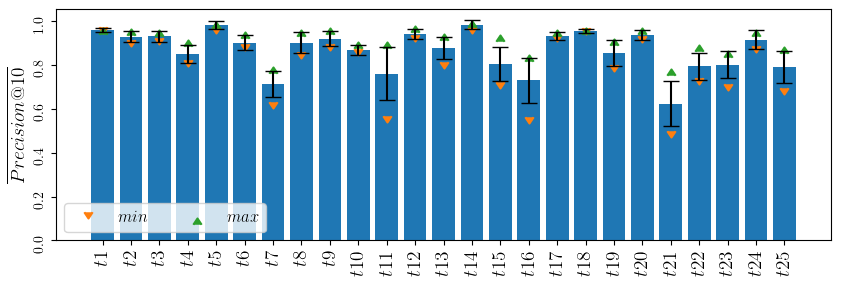

In [89]:
######### PRECISION @ 10 - IC

fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)

# original topic numbers
#axs.bar(df_ave_data.columns, df_general['mean_prec'], yerr=df_general['ci95_prec'], capsize=6)

axs.bar(topic_renaming, df_general['mean_prec'], yerr=df_general['ci95_prec'], capsize=6)
axs.scatter(topic_renaming, df_general['min_prec'], label = 'min', marker = plt_marker.CARETDOWN)
axs.scatter(topic_renaming, df_general['max_prec'], label = 'max', marker = plt_marker.CARETUP)
axs.legend(['$min$', '$max$'], loc='lower left', ncol=2, fontsize=12)

#fig.suptitle('Variability of Precision@10  - '+ comb)

axs.set_ylabel(r'$$\overline{Precision@10}$$',fontsize=14)

# change the fontsize
axs.set_xticklabels(topic_renaming, fontsize=14)

plt.savefig(save_path + "Co3_dmoz_variability_p10.svg")
plt.show()

#GLOBAL RECALL

In [90]:
dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in files:
        if "_globalRecall_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')

            # display DataFrame                                                    
            df_metric = df_metric.iloc[-1:]   ###### ------------> ya es poblacional, me quedo con la ultima gen
            #print(df_metric)          
            

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)     

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.893401,0.975921,0.861507,0.867925,0.818454,0.98750,0.805907,0.899160,0.896552,0.875969,...,0.690722,0.886957,0.909357,0.825137,0.781336,0.608563,0.822967,0.688713,0.882597,0.815068
1,0.878173,0.946176,0.883910,0.867925,0.819652,0.96875,0.797468,0.903361,0.965517,0.875969,...,0.742268,0.895652,0.856725,0.857923,0.806953,0.727829,0.856459,0.393961,0.842541,0.842466
2,0.893401,0.954674,0.873727,0.905660,0.815458,0.96250,0.818565,0.865546,0.948276,0.842377,...,0.628866,0.869565,0.891813,0.797814,0.778591,0.709480,0.851675,0.618979,0.879834,0.876712
3,0.875635,0.971671,0.849287,0.867925,0.886159,0.98125,0.822785,0.903361,0.948276,0.844961,...,0.814433,0.913043,0.918129,0.825137,0.761208,0.697248,0.822967,0.675054,0.830110,0.746575
4,0.908629,0.966006,0.896130,0.896226,0.794488,0.98125,0.772152,0.878151,0.956897,0.829457,...,0.752577,0.865217,0.894737,0.836066,0.795059,0.529052,0.827751,0.616104,0.856354,0.856164


In [91]:
stats = df_ave_data.agg(['mean', 'count', 'std', 'max', 'min'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.889848,0.962890,0.872912,0.881132,0.826842,0.97625,0.803376,0.889916,0.943103,0.853747,...,0.725773,0.886087,0.894152,0.828415,0.784629,0.654434,0.836364,0.598562,0.858287,0.827397
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.013382,0.012283,0.018364,0.018390,0.034702,0.01027,0.020147,0.017170,0.026987,0.021119,...,0.069769,0.019541,0.023519,0.021721,0.017342,0.083778,0.016366,0.118916,0.022917,0.050425
max,0.908629,0.975921,0.896130,0.905660,0.886159,0.98750,0.822785,0.903361,0.965517,0.875969,...,0.814433,0.913043,0.918129,0.857923,0.806953,0.727829,0.856459,0.688713,0.882597,0.876712
min,0.875635,0.946176,0.849287,0.867925,0.794488,0.96250,0.772152,0.865546,0.896552,0.829457,...,0.628866,0.865217,0.856725,0.797814,0.761208,0.529052,0.822967,0.393961,0.830110,0.746575


In [92]:
t = stats.transpose()
t.iloc[0]

mean     0.889848
count    5.000000
std      0.013382
max      0.908629
min      0.875635
Name: 1, dtype: float64

In [93]:
import math

ci95_hi = []
ci95_lo = []
ci95=[]
max=[]
min=[]
for i in t.index:
    m, c, s, ma, mi = t.loc[i]
    ci95_hi.append(m + IC_95(s,c))
    ci95_lo.append(m - IC_95(s,c))    
    ci95.append(IC_95(s,c))
    max.append(ma)
    min.append(mi)

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi
t['ci95'] = ci95
t['max']= max
t['min']= min

t.rename({'mean':'mean_gr', 'count': 'runs', 'std': 'std_gr', 'ci95_lo':'ci95_lo_gr', 'ci95_hi':  'ci95_hi_gr', 'ci95':  'ci95_gr', 'max': 'max_gr', 'min': 'min_gr'}, axis='columns', inplace=True)


#print (t.to_latex())


df_general['mean_gr'] = t['mean_gr']
df_general['std_gr'] = t['std_gr']
df_general['ci95_lo_gr']= t ['ci95_lo_gr']
df_general['ci95_hi_gr']=t['ci95_hi_gr']
df_general['ci95_gr']=t['ci95_gr']
df_general['max_gr']=t['max_gr']
df_general['min_gr']=t['min_gr']
df_general

,runs,mean_prec,std_prec,max_prec,min_prec,ci95_lo_prec,ci95_hi_prec,ci95_prec,mean_gr,std_gr,ci95_lo_gr,ci95_hi_gr,ci95_gr,max_gr,min_gr
1,5.0,0.957306,0.009195,0.965,0.945000,0.949246,0.965365,0.008060,0.889848,0.013382,0.878118,0.901578,0.011730,0.908629,0.875635
134,5.0,0.928000,0.027749,0.961,0.886000,0.903677,0.952323,0.024323,0.962890,0.012283,0.952123,0.973656,0.010767,0.975921,0.946176
187,5.0,0.929800,0.028385,0.960,0.893000,0.904920,0.954680,0.024880,0.872912,0.018364,0.856816,0.889009,0.016097,0.896130,0.849287
215,5.0,0.849600,0.045780,0.911,0.795000,0.809472,0.889728,0.040128,0.881132,0.018390,0.865012,0.897252,0.016120,0.905660,0.867925
221,5.0,0.979200,0.020167,0.994,0.945000,0.961523,0.996877,0.017677,0.826842,0.034702,0.796425,0.857260,0.030418,0.886159,0.794488
25,5.0,0.900800,0.039727,0.949,0.868000,0.865978,0.935622,0.034822,0.976250,0.010270,0.967248,0.985252,0.009002,0.987500,0.962500
259,5.0,0.710944,0.067826,0.789,0.603500,0.651492,0.770397,0.059452,0.803376,0.020147,0.785716,0.821036,0.017660,0.822785,0.772152
289,5.0,0.900600,0.055198,0.957,0.831000,0.852217,0.948983,0.048383,0.889916,0.017170,0.874865,0.904967,0.015051,0.903361,0.865546
350,5.0,0.919233,0.041320,0.966,0.867167,0.883015,0.955452,0.036219,0.943103,0.026987,0.919448,0.966759,0.023655,0.965517,0.896552
363,5.0,0.867000,0.024525,0.904,0.843000,0.845502,0.888498,0.021498,0.853747,0.021119,0.835235,0.872259,0.018512,0.875969,0.829457


/tmp/ipykernel_18539/4109814178.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(topic_renaming, fontsize=14)


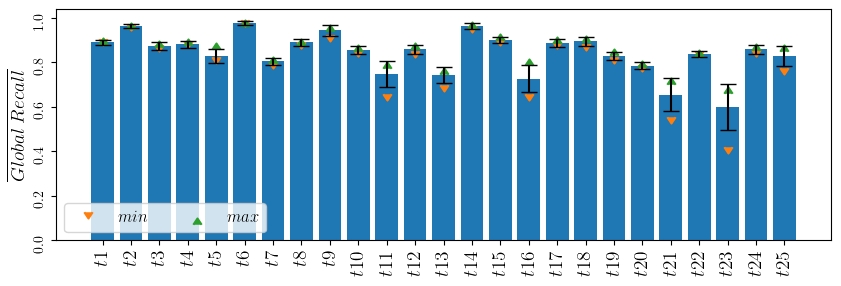

In [94]:
######### GLOBAL RECALL - IC

fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)

axs.bar(topic_renaming, df_general['mean_gr'], yerr=df_general['ci95_gr'], capsize=6)

axs.scatter(topic_renaming, df_general['min_gr'], label = 'min', marker = plt_marker.CARETDOWN)
axs.scatter(topic_renaming, df_general['max_gr'], label = 'max', marker = plt_marker.CARETUP)

axs.legend(['$min$', '$max$'], loc='lower left', ncol=2, fontsize=12)

axs.set_ylabel(r'$$\overline{Global \: Recall}$$', fontsize=14)

# change the fontsize
axs.set_xticklabels(topic_renaming, fontsize=14)

#fig.suptitle('Variability of Global Recall  - '+ comb)

plt.savefig(save_path + "Co3_dmoz_variability_gr.svg")
plt.show()


In [95]:
dir_path = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

df_ave_data = pd.DataFrame()

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
    for f in files:
        if "_meanJaccardIndex_all_run.txt" in f:
            #print(f)
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')

            # display DataFrame                                                    
            df_metric = df_metric.iloc[-1:]   ###### ------------> ya es poblacional, me quedo con la ultima gen
            #print(df_metric)          
            

            #df_ave_data = df_metric.copy()
            df_ave_data[t] = df_metric.mean(numeric_only=True, axis=0)     

#df_ave_data['average_p@10'] = df_ave_data.mean(numeric_only=True, axis=1)         

#total_average = df_ave_data['average_p@10'].mean()
#print("MEAN AVERAGE ", total_average)

df_ave_data

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.636651,0.805983,0.811588,0.738129,0.586175,0.967116,0.310826,0.617999,0.576929,0.841437,...,0.281944,0.834511,0.733969,0.836889,0.720009,0.163621,0.893503,0.243165,0.706629,0.677225
1,0.772715,0.909842,0.865648,0.653972,0.651421,0.975928,0.330418,0.847393,0.765724,0.850443,...,0.279936,0.792560,0.696814,0.748976,0.637697,0.520028,0.891798,0.211716,0.290813,0.695116
2,0.712446,0.891341,0.850867,0.693918,0.716372,0.978317,0.225233,0.864484,0.885332,0.805088,...,0.239071,0.783658,0.628226,0.856773,0.728309,0.154107,0.859481,0.447276,0.620468,0.705086
3,0.589538,0.911779,0.886548,0.558846,0.820278,0.966447,0.184104,0.806112,0.832476,0.772684,...,0.592618,0.811893,0.563283,0.539241,0.707744,0.129552,0.872808,0.242459,0.793266,0.381710
4,0.800506,0.911285,0.848090,0.737502,0.801901,0.924637,0.152787,0.840608,0.721318,0.853119,...,0.379536,0.828094,0.747203,0.828467,0.670479,0.234067,0.879183,0.458268,0.147513,0.719104


In [96]:
stats = df_ave_data.agg(['mean', 'count', 'std', 'max', 'min'])
stats

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.702371,0.886046,0.852548,0.676473,0.715229,0.962489,0.240674,0.795319,0.756356,0.824554,...,0.354621,0.810143,0.673899,0.762069,0.692847,0.240275,0.879355,0.320577,0.511738,0.635648
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.089066,0.045562,0.027514,0.074453,0.099090,0.021800,0.077682,0.101372,0.118256,0.034787,...,0.142719,0.021964,0.077183,0.131148,0.037944,0.161137,0.014079,0.121406,0.278626,0.142773
max,0.800506,0.911779,0.886548,0.738129,0.820278,0.978317,0.330418,0.864484,0.885332,0.853119,...,0.592618,0.834511,0.747203,0.856773,0.728309,0.520028,0.893503,0.458268,0.793266,0.719104
min,0.589538,0.805983,0.811588,0.558846,0.586175,0.924637,0.152787,0.617999,0.576929,0.772684,...,0.239071,0.783658,0.563283,0.539241,0.637697,0.129552,0.859481,0.211716,0.147513,0.381710


In [97]:
t = stats.transpose()
t.iloc[0]


mean     0.702371
count    5.000000
std      0.089066
max      0.800506
min      0.589538
Name: 1, dtype: float64

In [98]:
import math

ci95_hi = []
ci95_lo = []
ci95=[]
max=[]
min=[]

for i in t.index:
    m, c, s, ma, mi = t.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95.append(IC_95(s,c))
    max.append(ma)
    min.append(mi)

t['ci95_lo'] = ci95_lo
t['ci95_hi'] = ci95_hi
t['ci95'] = ci95
t['max']= max
t['min']= min


t.rename({'mean':'mean_js', 'count': 'runs', 'std': 'std_js', 'ci95_lo':'ci95_lo_js', 'ci95_hi':  'ci95_hi_js', 'ci95':  'ci95_js', 'max': 'max_js', 'min': 'min_js'}, axis='columns', inplace=True)


print (t.to_latex())


df_general['mean_js'] = t['mean_js']
df_general['std_js'] = t['std_js']
df_general['ci95_lo_js']= t ['ci95_lo_js']
df_general['ci95_hi_js']=t['ci95_hi_js']
df_general['ci95_js']=t['ci95_js']
df_general['min_js']=t['min_js']
df_general['max_js']=t['max_js']

df_general['runs'] = df_general['runs'].astype(int)

print(df_general.to_latex())
df_general




\begin{tabular}{lrrrrrrrr}
\toprule
{} &   mean\_js &  runs &    std\_js &    max\_js &    min\_js &  ci95\_lo\_js &  ci95\_hi\_js &   ci95\_js \\
\midrule
1   &  0.702371 &   5.0 &  0.089066 &  0.800506 &  0.589538 &    0.624302 &    0.780441 &  0.078069 \\
134 &  0.886046 &   5.0 &  0.045562 &  0.911779 &  0.805983 &    0.846109 &    0.925983 &  0.039937 \\
187 &  0.852548 &   5.0 &  0.027514 &  0.886548 &  0.811588 &    0.828431 &    0.876665 &  0.024117 \\
215 &  0.676473 &   5.0 &  0.074453 &  0.738129 &  0.558846 &    0.611213 &    0.741734 &  0.065261 \\
221 &  0.715229 &   5.0 &  0.099090 &  0.820278 &  0.586175 &    0.628374 &    0.802085 &  0.086856 \\
25  &  0.962489 &   5.0 &  0.021800 &  0.978317 &  0.924637 &    0.943380 &    0.981597 &  0.019109 \\
259 &  0.240674 &   5.0 &  0.077682 &  0.330418 &  0.152787 &    0.172582 &    0.308765 &  0.068091 \\
289 &  0.795319 &   5.0 &  0.101372 &  0.864484 &  0.617999 &    0.706462 &    0.884176 &  0.088857 \\
350 &  0.756356 &   

,runs,mean_prec,std_prec,max_prec,min_prec,ci95_lo_prec,ci95_hi_prec,ci95_prec,mean_gr,std_gr,...,ci95_gr,max_gr,min_gr,mean_js,std_js,ci95_lo_js,ci95_hi_js,ci95_js,min_js,max_js
1,5,0.957306,0.009195,0.965,0.945000,0.949246,0.965365,0.008060,0.889848,0.013382,...,0.011730,0.908629,0.875635,0.702371,0.089066,0.624302,0.780441,0.078069,0.589538,0.800506
134,5,0.928000,0.027749,0.961,0.886000,0.903677,0.952323,0.024323,0.962890,0.012283,...,0.010767,0.975921,0.946176,0.886046,0.045562,0.846109,0.925983,0.039937,0.805983,0.911779
187,5,0.929800,0.028385,0.960,0.893000,0.904920,0.954680,0.024880,0.872912,0.018364,...,0.016097,0.896130,0.849287,0.852548,0.027514,0.828431,0.876665,0.024117,0.811588,0.886548
215,5,0.849600,0.045780,0.911,0.795000,0.809472,0.889728,0.040128,0.881132,0.018390,...,0.016120,0.905660,0.867925,0.676473,0.074453,0.611213,0.741734,0.065261,0.558846,0.738129
221,5,0.979200,0.020167,0.994,0.945000,0.961523,0.996877,0.017677,0.826842,0.034702,...,0.030418,0.886159,0.794488,0.715229,0.099090,0.628374,0.802085,0.086856,0.586175,0.820278
25,5,0.900800,0.039727,0.949,0.868000,0.865978,0.935622,0.034822,0.976250,0.010270,...,0.009002,0.987500,0.962500,0.962489,0.021800,0.943380,0.981597,0.019109,0.924637,0.978317
259,5,0.710944,0.067826,0.789,0.603500,0.651492,0.770397,0.059452,0.803376,0.020147,...,0.017660,0.822785,0.772152,0.240674,0.077682,0.172582,0.308765,0.068091,0.152787,0.330418
289,5,0.900600,0.055198,0.957,0.831000,0.852217,0.948983,0.048383,0.889916,0.017170,...,0.015051,0.903361,0.865546,0.795319,0.101372,0.706462,0.884176,0.088857,0.617999,0.864484
350,5,0.919233,0.041320,0.966,0.867167,0.883015,0.955452,0.036219,0.943103,0.026987,...,0.023655,0.965517,0.896552,0.756356,0.118256,0.652699,0.860012,0.103656,0.576929,0.885332
363,5,0.867000,0.024525,0.904,0.843000,0.845502,0.888498,0.021498,0.853747,0.021119,...,0.018512,0.875969,0.829457,0.824554,0.034787,0.794062,0.855047,0.030493,0.772684,0.853119


/tmp/ipykernel_18539/3777930271.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(topic_renaming, fontsize=14)


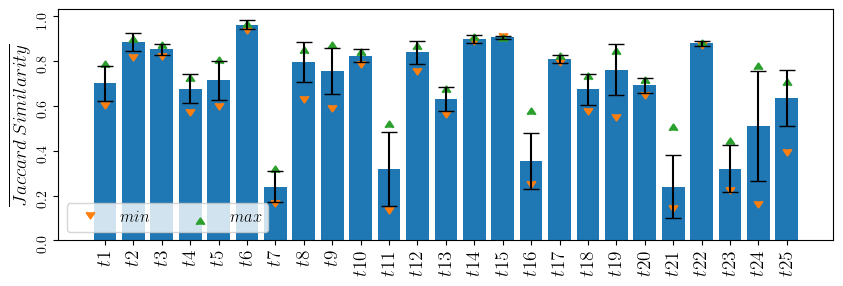

In [99]:
######### JACCARD

fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)

axs.bar(topic_renaming, df_general['mean_js'], yerr=df_general['ci95_js'], capsize=6)
axs.scatter(topic_renaming, df_general['min_js'], label = 'min', marker = plt_marker.CARETDOWN)
axs.scatter(topic_renaming, df_general['max_js'], label = 'max', marker = plt_marker.CARETUP)

axs.legend(['$min$', '$max$'], loc='lower left', ncol=2, fontsize=12)
axs.set_ylabel(r'$$\overline{Jaccard  \: Similarity}$$', fontsize=14)

# change the fontsize
axs.set_xticklabels(topic_renaming, fontsize=14)

#fig.suptitle('Variability of Jaccard Similarity Index  - '+ comb)
plt.savefig(save_path + "Co3_dmoz_variability_js.svg")
plt.show()